In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras as K
from skimage import io
from skimage.transform import resize

model =K.models.load_model("MattModel.h5")
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 350)               274750    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3510      
Total params: 278,260
Trainable params: 278,260
Non-trainable params: 0
_________________________________________________________________


In [24]:
def prd(imageinput):
    img28=np.abs(1-resize(imageinput,(28,28),mode='constant'))
    img28=(img28[:,:,0]*0.3+img28[:,:,1]*0.6+img28[:,:,2]*0.1)
    plt.imshow(img28,cmap='gray')
    #plt.show()
    imgp=img28.reshape((1,28,28))
    L = model.predict(imgp)
    plt.show()
    return np.argmax(L[0])

In [3]:
def rea(path):
    return io.imread(path)

In [4]:
pic=rea("11.png")

In [5]:
pic.shape

(648, 1152, 3)

In [6]:
def findrangeoflist(var):
    cymask=(var>0)
    nowcontinewus=False
    locatey=list()
    for i in range(len(cymask)):
        if cymask[i]==True and nowcontinewus==False:
            nowcontinewus=True
            la=locatey.append([i,0])
        elif cymask[i]==True and nowcontinewus==True:
            locatey[len(locatey)-1][1]=locatey[len(locatey)-1][1]+1
        elif cymask[i]==False and nowcontinewus==True:
            nowcontinewus=False
    return locatey

In [7]:
picbi=((pic[:,:,0]+pic[:,:,1]+pic[:,:,2])==0)

In [8]:
arsy=np.zeros(picbi.shape[0])
for y in range(picbi.shape[0]):
    arsy[y]=np.sum(picbi[y,:])
    #print(arsx[x])

In [9]:
arsy

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  19.,  30.,  38.,  45.,  49.,
        57.,  61.,  66.,  70.,  73.,  77.,  81.,  86., 102., 109., 136.,
       155., 304., 316., 324., 332., 338., 346., 351., 358., 363., 367.,
       373., 376., 381., 383., 386., 389., 393., 396., 382., 374., 373.,
       371., 366., 360., 359., 353., 353., 348., 346., 341., 340., 338.,
       334., 311., 291., 174., 173., 170., 171., 170., 169., 168., 168.,
       169., 167., 167., 169., 167., 168., 167., 165., 166., 164., 163.,
       162., 160., 158., 155., 155., 154., 153., 150., 151., 151., 150.,
       151., 151., 151., 152., 152., 149., 148., 151., 149., 147., 148.,
       147., 148., 149., 147., 148., 148., 148., 148., 148., 150., 148.,
       151., 150., 148., 150., 149., 149., 147., 147., 147., 145., 146.,
       146., 146., 145., 145., 144., 145., 145., 146., 144., 146., 147.,
       146., 146., 146., 145., 146., 147., 147., 14

In [10]:
arsy=findrangeoflist(arsy)
print(arsy)

[[17, 313], [350, 296]]


In [11]:
# y y+ x x+
finalra=list()
for i in range(len(arsy)):
    arsx=np.zeros(picbi.shape[1])
    for x in range(picbi.shape[1]):
        arsx[x]=np.sum(picbi[arsy[i][0]:arsy[i][0]+arsy[i][1],x])
    arsx=findrangeoflist(arsx)
    print(arsx)
    for x in range(len(arsx)):
        #finalra.append(0)
        finalra.append([arsy[i][0],arsy[i][1],arsx[x][0],arsx[x][1]])
print(finalra)

[[34, 233], [392, 204], [744, 162]]
[[244, 160], [526, 249]]
[[17, 313, 34, 233], [17, 313, 392, 204], [17, 313, 744, 162], [350, 296, 244, 160], [350, 296, 526, 249]]


In [12]:
def arrangeitnow(pii):
    xx=pii.shape[1]
    yy=pii.shape[0]
    ou=np.full((max(xx,yy), max(xx,yy),3), 255)
    ou[:yy,:xx]=pii
    plt.imshow(ou)
    print(ou)
    return ou

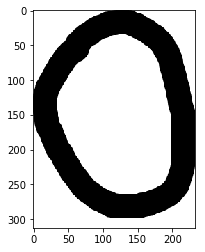

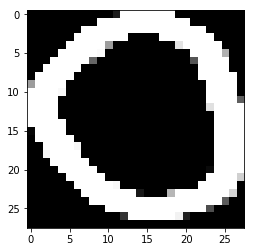

2
-----------------------------------------------------


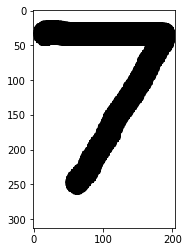

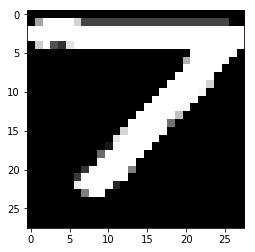

2
-----------------------------------------------------


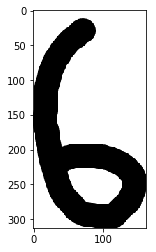

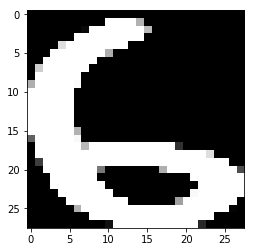

2
-----------------------------------------------------


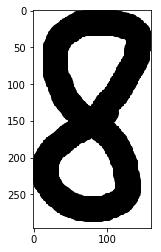

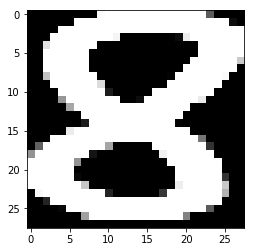

3
-----------------------------------------------------


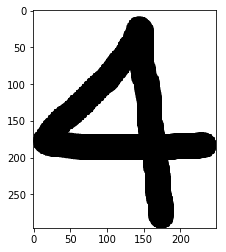

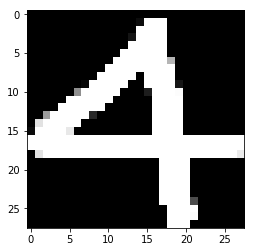

2
-----------------------------------------------------


In [26]:
for i in range(len(finalra)):
    plt.imshow(pic[finalra[i][0]:finalra[i][0]+finalra[i][1],finalra[i][2]:finalra[i][2]+finalra[i][3]],cmap='gray')
    plt.show()
    print(prd((pic[finalra[i][0]:finalra[i][0]+finalra[i][1],finalra[i][2]:finalra[i][2]+finalra[i][3]])))
    print("-----------------------------------------------------")

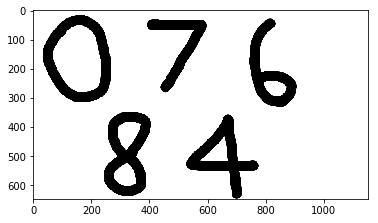

In [27]:
plt.imshow(pic,cmap='gray')
plt.show()
plt.close()